In [1]:
import pandas
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,confusion_matrix,recall_score,f1_score
from sklearn import metrics

In [2]:
dataset = pandas.read_csv("cleandata.csv")
dataset = dataset.drop(columns='Unnamed: 0')
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,1,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,1,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,1,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,1,0,sales,low
4,0.37,0.52,2,200.5,3.4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
12254,0.40,0.47,2,128.0,3.0,0,1,0,sales,medium
12255,0.43,0.46,2,157.0,3.0,0,1,0,sales,medium
12256,0.89,0.88,5,228.0,5.0,1,1,0,support,low
12257,0.76,0.83,6,293.0,6.0,0,1,0,support,low


In [3]:
le = LabelEncoder()
dataset['department'] = le.fit_transform(dataset['department'])
dataset['salary'] = le.fit_transform(dataset['salary'])


In [4]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,1,0,7,1
1,0.80,0.86,5,262.0,6.0,0,1,0,7,2
2,0.11,0.88,7,272.0,4.0,0,1,0,7,2
3,0.72,0.87,5,223.0,5.0,0,1,0,7,1
4,0.37,0.52,2,200.5,3.4,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
12254,0.40,0.47,2,128.0,3.0,0,1,0,7,2
12255,0.43,0.46,2,157.0,3.0,0,1,0,7,2
12256,0.89,0.88,5,228.0,5.0,1,1,0,8,1
12257,0.76,0.83,6,293.0,6.0,0,1,0,8,1


In [5]:
def predict_accuracy(dataset,size_of_test,cross_val):
    strainx,stestx,strainy,stesty = train_test_split(dataset.drop(columns='left'),dataset['left'],test_size=size_of_test,random_state=42)
    predict = DecisionTreeClassifier()
    res = cross_val_predict(estimator=predict,X=strainx,y=strainy,cv=cross_val)
    print("Precision score: ",precision_score(strainy,res))
    print("Recall score: ",recall_score(strainy,res))
    print("f1 score: ",f1_score(strainy,res))
    cm = confusion_matrix(strainy,res)
    metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]).plot()

Precision score:  0.9060622610595304
Recall score:  0.9191135734072022
f1 score:  0.9125412541254125


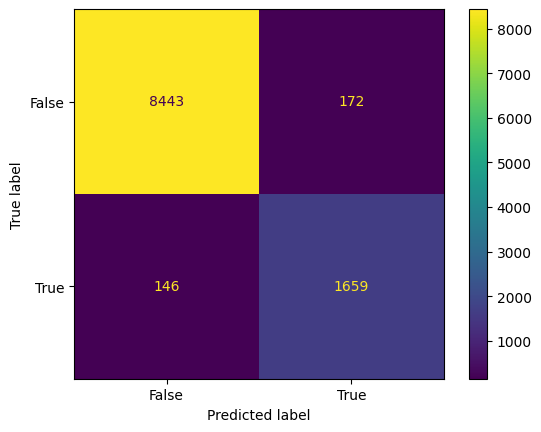

In [6]:
predict_accuracy(dataset,0.15,5)

Precision score:  0.8987029030265596
Recall score:  0.9185606060606061
f1 score:  0.9085232594442709


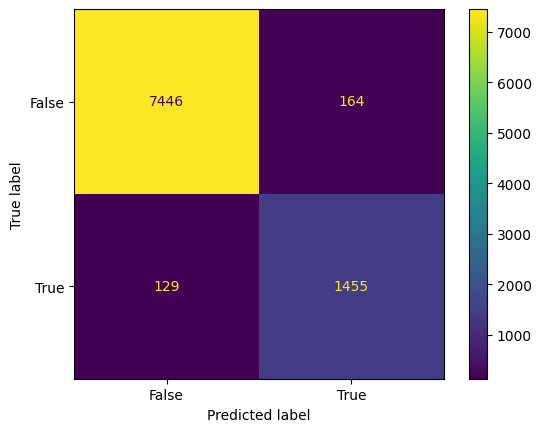

In [7]:
predict_accuracy(dataset,0.25,5)

Precision score:  0.8888888888888888
Recall score:  0.910948905109489
f1 score:  0.8997837058399423


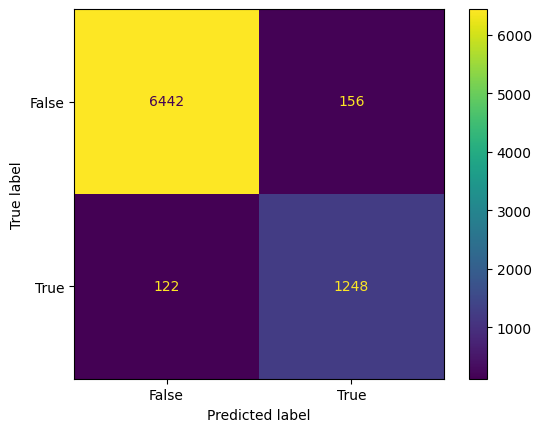

In [8]:
predict_accuracy(dataset,0.35,5)